 <center><h1> CAR PRICE PREDICTION </h1></center>

In [1]:
# importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.regression.linear_model as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder

from time import time
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree  import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [4]:
# importing dataset and showing first 5 rows
df = pd.read_excel('clean car data (1).xlsx')# this csv file is generated by web scrapping 
df.shape

(17066, 9)

# Data Preprocessing & Cleaning

In [3]:
# removing special characters
df = df.replace(r'Â','', regex=True) 
df.head()

,Distance(km),Fuel Type,Location,Manufact_Year,Price,Make,Model,Age,2019
0,48200,Diesel,NaN,2016,3200000,Audi,Q3 35 TDI Technology,3,NaN
1,55310,Diesel,Mumbai,2013,245000,Audi,Q3 2.0 TDI quattro,6,NaN
2,30120,Diesel,Nadia,2013,255000,Audi,Q3 2.0 TDI quattro,6,NaN
3,98000,Diesel,New Delhi,2011,249900,Audi,A8 L- 2013 3.0 TDI quattro,8,NaN
4,42000,Diesel,New Delhi,2009,220000,Audi,A8 (2003 - 2010) 3.0 TDi,10,NaN


As we can see all special character were removed by using regular expression

#### Checking Null values

In [4]:
df.isnull().sum()

Distance(km)         0
Fuel Type            0
Location          7490
Manufact_Year        0
Price                0
Make                 0
Model               18
Age                  0
2019             17066
dtype: int64

As "Location" & "2019" columns has too many null value so we can drop that columns.

In [5]:
#dropping unnecessary columns
df1=df.drop(columns=['2019','Location'],axis=1)

In [6]:
# Checking again null values
df1.isnull().sum()

Distance(km)      0
Fuel Type         0
Manufact_Year     0
Price             0
Make              0
Model            18
Age               0
dtype: int64

Now we can see Model has 18 null values , so we can remove those using DropNa

In [7]:
#removing null values
df2 = df1.dropna()

In [8]:
df2.isnull().sum()

Distance(km)     0
Fuel Type        0
Manufact_Year    0
Price            0
Make             0
Model            0
Age              0
dtype: int64

In [9]:
df2.isnull().sum().any()

False

Dropped null values from 'Model' column

In [10]:
df2["Model"].nunique()

2024

As "Model" column has too many distinct values so we can drop this column too

In [11]:
df2 = df2.drop(['Model'],axis=1)

In [12]:
df2.head()

,Distance(km),Fuel Type,Manufact_Year,Price,Make,Age
0,48200,Diesel,2016,3200000,Audi,3
1,55310,Diesel,2013,245000,Audi,6
2,30120,Diesel,2013,255000,Audi,6
3,98000,Diesel,2011,249900,Audi,8
4,42000,Diesel,2009,220000,Audi,10


#### Label Encoding 

As "Fuel Type" and "Make" are catagorical variables we have to encode them using label encoding

In [13]:
# converting catagorical data into numbers
le = LabelEncoder()
df2['Fuel Type'] = le.fit_transform(df2['Fuel Type'])
df2['Make'] = le.fit_transform(df2['Make'])
df2.head()

,Distance(km),Fuel Type,Manufact_Year,Price,Make,Age
0,48200,1,2016,3200000,0,3
1,55310,10,2013,245000,0,6
2,30120,10,2013,255000,0,6
3,98000,10,2011,249900,0,8
4,42000,10,2009,220000,0,10


Now our data look likes ready for analysis

##### Checking short summary of data

In [14]:
 # short summary of data
# import pandas_profiling 
# pandas_profiling.ProfileReport(df2)

In [15]:
df2.shape

(17048, 6)

In [16]:
df2.corr()

,Distance(km),Fuel Type,Manufact_Year,Price,Make,Age
Distance(km),1.000000,-0.323163,-0.372802,0.084183,0.089751,0.372802
Fuel Type,-0.323163,1.000000,0.112913,-0.625323,-0.167205,-0.112913
Manufact_Year,-0.372802,0.112913,1.000000,0.207302,-0.005781,-1.000000
Price,0.084183,-0.625323,0.207302,1.000000,0.093960,-0.207302
Make,0.089751,-0.167205,-0.005781,0.093960,1.000000,0.005781
Age,0.372802,-0.112913,-1.000000,-0.207302,0.005781,1.000000


In [17]:
df2.describe()

,Distance(km),Fuel Type,Manufact_Year,Price,Make,Age
count,1.704800e+04,17048.000000,17048.000000,1.704800e+04,17048.000000,17048.000000
mean,6.630101e+04,8.865439,2011.869545,1.634855e+05,14.834761,7.130455
std,4.734640e+04,3.707222,2.985346,2.284318e+05,5.436729,2.985346
min,0.000000e+00,0.000000,2000.000000,1.020000e+04,0.000000,0.000000
25%,3.755900e+04,6.000000,2010.000000,3.550000e+04,14.000000,5.000000
50%,5.917000e+04,10.000000,2012.000000,7.500000e+04,16.000000,7.000000
75%,8.297350e+04,13.000000,2014.000000,2.300000e+05,16.000000,9.000000
max,1.300087e+06,13.000000,2019.000000,6.500000e+06,29.000000,19.000000


From this it seems that Distance has outliers , lets check it by using box plot

#### Checking for Outliers

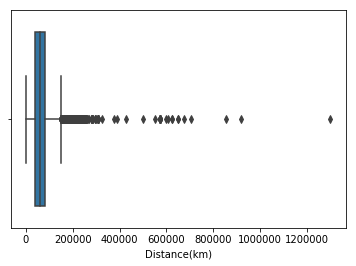

In [18]:
import seaborn as sns
sns.boxplot(x=df2['Distance(km)'])

Boxplot shows there are outliers present 

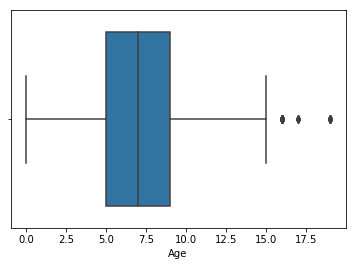

In [19]:
import seaborn as sns
sns.boxplot(x=df2['Age'])

Age also have few outliers

#### Removing Outliers

In [20]:
z = np.abs(stats.zscore(df2))
z

array([[ 0.38232133,  2.12171544,  1.38361707, 13.29326203,  2.72869901,
         1.38361707],
       [ 0.23214711,  0.30604982,  0.37867911,  0.35685434,  2.72869901,
         0.37867911],
       [ 0.76419895,  0.30604982,  0.37867911,  0.40063237,  2.72869901,
         0.37867911],
       ...,
       [ 0.44991029,  0.30604982,  1.04863775,  1.77964029,  2.60554756,
         1.04863775],
       [ 0.83130179,  0.30604982,  1.63119681,  0.15985321,  2.60554756,
         1.63119681],
       [ 0.23869479,  0.30604982,  0.37867911,  0.33496532,  2.60554756,
         0.37867911]])

In [21]:
finaldf = df2[(z < 3).all(axis=1)]

In [22]:
finaldf.shape

(16614, 6)

In [23]:
finaldf.head()

,Distance(km),Fuel Type,Manufact_Year,Price,Make,Age
1,55310,10,2013,245000,0,6
2,30120,10,2013,255000,0,6
3,98000,10,2011,249900,0,8
4,42000,10,2009,220000,0,10
5,41000,10,2009,265000,0,10


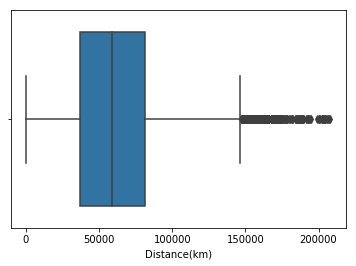

In [24]:
import seaborn as sns
sns.boxplot(x=finaldf['Distance(km)'])

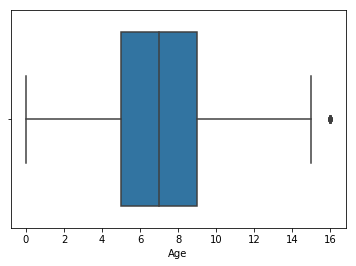

In [25]:
import seaborn as sns
sns.boxplot(x=finaldf['Age'])

Outliers removed sucessfully

# EDA & Data Visualization

Continuous  variable 

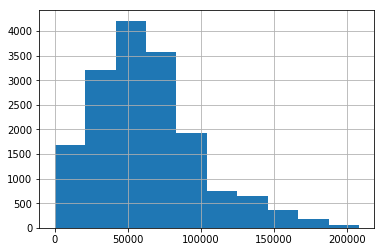

In [26]:
# histogram showing distribution
finaldf["Distance(km)"].hist()

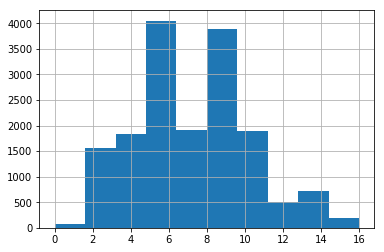

In [27]:
# histogram showing distrubution
finaldf["Age"].hist()

Categorical variable

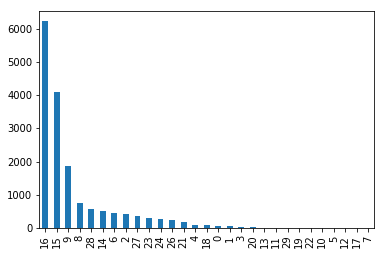

In [28]:
finaldf['Make'].value_counts().plot(kind='bar')

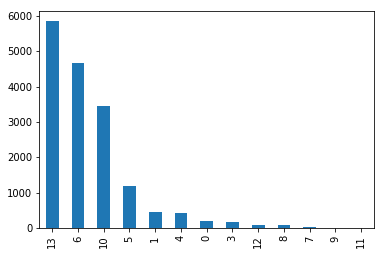

In [29]:
# bar graph
finaldf['Fuel Type'].value_counts().plot(kind='bar') 

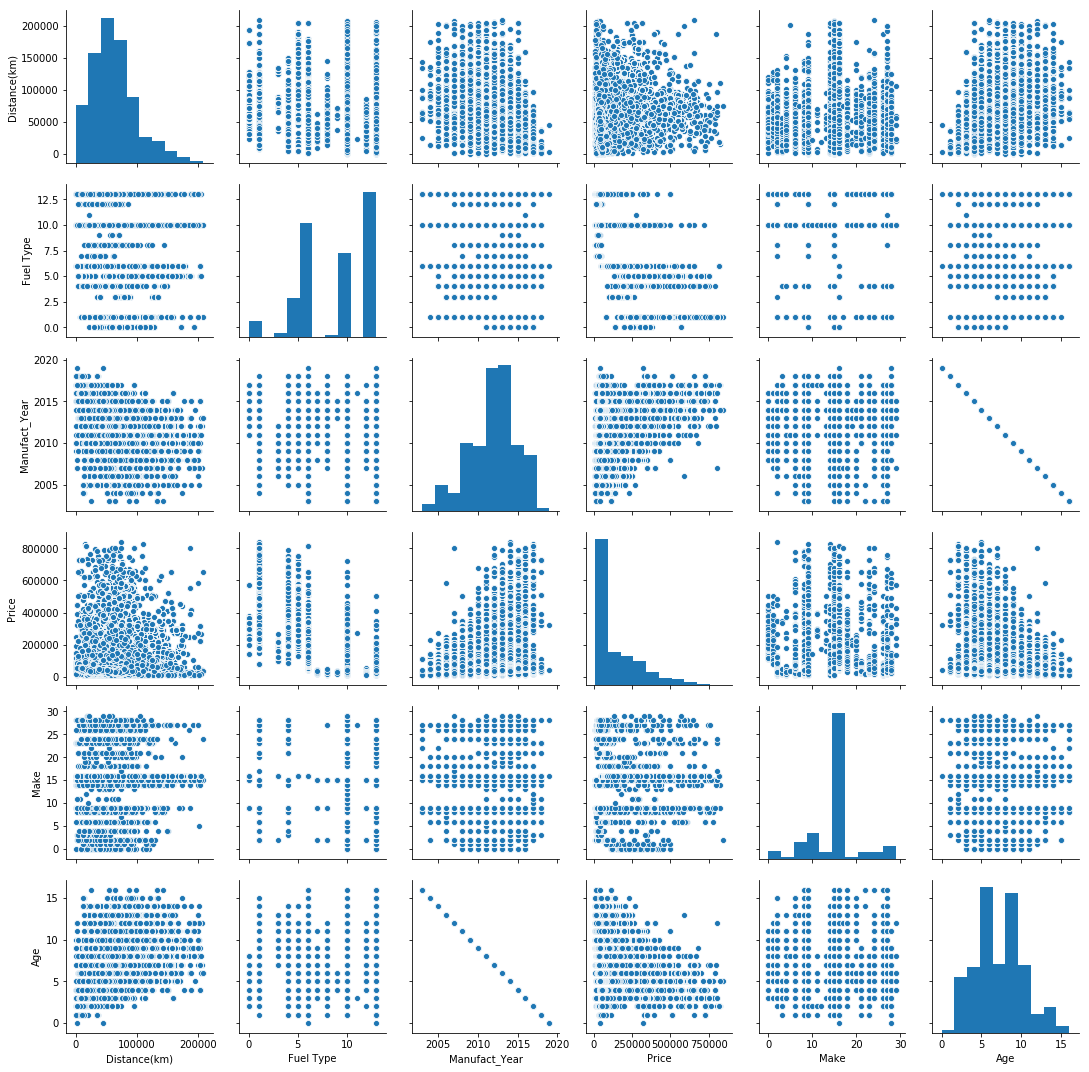

In [30]:
sns.pairplot(finaldf)# pairplot will plot alll the plots once at a time

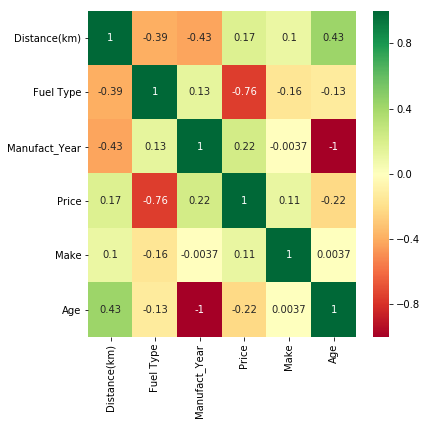

In [31]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = finaldf.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(6,6))
#plot heat map
g=sns.heatmap(finaldf[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Heatmap shows correlation among the variables

# Splitting data into X & Y

In [32]:
# in "X" we take all independent variables 
x = finaldf.drop(['Price'],axis=1)
x.head()

,Distance(km),Fuel Type,Manufact_Year,Make,Age
1,55310,10,2013,0,6
2,30120,10,2013,0,6
3,98000,10,2011,0,8
4,42000,10,2009,0,10
5,41000,10,2009,0,10


In [33]:
# in "y" we take dependent variable
y = finaldf['Price']
y.head()

1    245000
2    255000
3    249900
4    220000
5    265000
Name: Price, dtype: int64

# Feature Engineering

###### Used for feature selection and feature importance

In [34]:
bestfeatures = SelectKBest(score_func=chi2, k=5)# selecting best 5 features
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

featureScores

,Specs,Score
0,Distance(km),8.825408e+07
1,Fuel Type,1.988123e+04
2,Manufact_Year,3.007887e+01
3,Make,4.097810e+03
4,Age,8.497051e+03


#### More the "score " more important the feature is

 Hence "Distance","Fuel Type", " Age " are important features

In [35]:
print(featureScores.nlargest(5,'Score'))  #print 5 best features

           Specs         Score
0   Distance(km)  8.825408e+07
1      Fuel Type  1.988123e+04
4            Age  8.497051e+03
3           Make  4.097810e+03
2  Manufact_Year  3.007887e+01


showing top 5 best features

# Train_Test Split

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1000)
model = sm.OLS(y, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     8590.
Date:                Mon, 03 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:00:32   Log-Likelihood:            -2.1260e+05
No. Observations:               16614   AIC:                         4.252e+05
Df Residuals:                   16609   BIC:                         4.252e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Distance(km)      0.0070      0.022      0.314      0.753      -0.036       0.050
Fuel Type     -3.358e+04    204.175   -164.464      0.000    -3.4e+04   -3.32e+04
Manufact_Year   285.0435      1.784    159.740      0.000     281.546     288.541
Make           -486.9079    126.896     -3.837      0.000    -735.638    -238.177
Age           -1.655e+04    253.872    -65.190      0.000    -1.7e+04   -1.61e+04
==============================================================================
Omnibus:                     3665.724   Durbin-Watson:                   0.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11719.829
Skew:                           1.121   Prob(JB):                         0.00
Kurtosis:                       6.450   Cond. No.                     2.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression Models

### *LinearRegression

In [37]:
mlr=LinearRegression() # Applying linear regression model
mlr.fit(X_train,y_train) # fitting data
y_pred=mlr.predict(X_test)
LR=mlr.score(X_test,y_test) # accuracy 
varL = explained_variance_score(y_pred,y_test)
LR

0.6716628871257742

In [38]:
from sklearn.model_selection import cross_val_score # Using cross validation technique
cross_val_score(LinearRegression(),x,y)

array([0.61411391, 0.45797294, 0.66874745, 0.32907863, 0.62685996])

### *Random Forest Regressor

In [39]:
model = RandomForestRegressor(n_estimators=100,random_state=10)
model.fit(X_train,y_train)
RS=model.score(X_test,y_test)
pred = model.predict(X_test)
varR = explained_variance_score(pred,y_test)
RS

0.9677404260539298

In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestRegressor(n_estimators=80),x,y)

array([0.72693633, 0.83704062, 0.85564299, 0.49609093, 0.62761259])

### *GradientBoostingRegressor

In [41]:
GB=GradientBoostingRegressor(n_estimators=100, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1).fit(X_train, y_train)


gradient=GB.score(X_test,y_test) 

pred = GB.predict(X_test)
varG = explained_variance_score(pred,y_test)
gradient

0.9256748550914506

In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(GradientBoostingRegressor(n_estimators=80),x,y)

array([0.79009019, 0.86768516, 0.88888846, 0.72029506, 0.71918039])

### *XGBoost

In [43]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(X_train, y_train)
xgboost=model.score(X_test,y_test)
pred = model.predict(X_test)
xgbR = explained_variance_score(pred,y_test)
xgboost

C:\Users\Rushal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:00:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8864611440199966

In [44]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb
cross_val_score(xgb.XGBRegressor(),x,y)

C:\Users\Rushal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:00:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Rushal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:00:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Rushal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:00:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Rushal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:00:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Rushal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:00:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.78853385, 0.87200623, 0.88987955, 0.72556787, 0.71659596])

In [45]:
All_Explianed_Var_Score=[["Linear Regression",varL],["RandomForest",varR],["GradientBoosting",varG],["XGBoosting",xgbR]]

In [46]:
Explianed_Var_Score= pd.DataFrame(All_Explianed_Var_Score, columns = ['Model', 'Explained var score'])

In [47]:
Explianed_Var_Score

,Model,Explained var score
0,Linear Regression,0.501957
1,RandomForest,0.967311
2,GradientBoosting,0.916198
3,XGBoosting,0.864786


In [48]:
All_Accuracy=[["Linear Regression",LR],["RandomForest",RS],["GradientBoosting",gradient],["XGBoosting",xgboost]]

In [49]:
df_accuracy = pd.DataFrame(All_Accuracy, columns = ['Model', 'Accuracy'])

In [50]:
df_accuracy

,Model,Accuracy
0,Linear Regression,0.671663
1,RandomForest,0.967740
2,GradientBoosting,0.925675
3,XGBoosting,0.886461
